# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [15]:
# ============================================
# 1) Install & import dependencies
# ============================================
!pip install pandas openpyxl

import pandas as pd
import numpy as np

# ============================================
# 2) Upload your Excel file (Data-22Sep.xlsx)
# ============================================
from google.colab import files
uploaded = files.upload()   # Choose the file from your Downloads folder

# After upload, the filename will be in `uploaded.keys()`
file_name = list(uploaded.keys())[0]
print("Using file:", file_name)

# ============================================
# 3) Parameters
# ============================================
NEAR_SHEET = "near"
FAR_SHEET = "far"

TARGET_CAL = 0.0250   # your calendar level
TICK_SIZE = 0.005
SHORT_S = 5
MED_S = 30
LONG_S = 300

# ============================================
# 4) Helper functions
# ============================================
def load_and_normalize(path, sheet):
    df = pd.read_excel(path, sheet_name=sheet)
    col_map = {}
    if 'Time' in df.columns: col_map['Time'] = 'timestamp'
    for k_in, k_out in [('BQ1','bid_qty'),('BQ2','bid_qty'),
                        ('Bid1','best_bid'),('Bid2','best_bid'),
                        ('Ask1','best_ask'),('Ask2','best_ask'),
                        ('AQ1','ask_qty'),('AQ2','ask_qty'),
                        ('TP1','trade_price'),('TP2','trade_price'),
                        ('TQ1','trade_qty'),('TQ2','trade_qty')]:
        if k_in in df.columns:
            col_map[k_in] = k_out
    df = df.rename(columns=col_map)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    for col in ['bid_qty','best_bid','best_ask','ask_qty','trade_price','trade_qty']:
        if col not in df.columns: df[col] = 0
    return df.sort_values('timestamp').reset_index(drop=True)

def find_prev_row(df, ts):
    idx = df[df['timestamp'] <= ts].index
    return df.loc[idx.max()] if len(idx) else None

def prints_in_window(df, ts, window_s, side, fill_price):
    start, end = ts, ts + pd.Timedelta(seconds=window_s)
    subset = df[(df['timestamp'] > start) & (df['timestamp'] <= end) & (df['trade_qty'].fillna(0) > 0)]
    if side == 'buy':
        return int(subset[subset['trade_price'] <= fill_price]['trade_qty'].sum())
    else:
        return int(subset[subset['trade_price'] >= fill_price]['trade_qty'].sum())

# ============================================
# 5) Load data
# ============================================
near = load_and_normalize(file_name, NEAR_SHEET)
far = load_and_normalize(file_name, FAR_SHEET)

# ============================================
# 6) Match trades into calendar events
# ============================================
cand = pd.merge(
    near[['timestamp','trade_price','trade_qty']],
    far[['timestamp','trade_price','trade_qty']],
    on='timestamp',
    suffixes=('_near','_far')
)
cand = cand[(cand['trade_qty_near']>0) & (cand['trade_qty_far']>0)]
cand['calendar'] = cand['trade_price_near'] - cand['trade_price_far']
candidates = cand[np.isclose(cand['calendar'], TARGET_CAL, atol=1e-9)].reset_index(drop=True)
print("Found", len(candidates), "calendar events at", TARGET_CAL)

# ============================================
# 7) Analyze each event
# ============================================
results = []
for _, r in candidates.iterrows():
    ts = r['timestamp']
    near_prev = find_prev_row(near, ts)
    far_prev = find_prev_row(far, ts)
    if near_prev is None or far_prev is None: continue

    near_price, near_qty = float(r['trade_price_near']), int(r['trade_qty_near'])
    far_price, far_qty   = float(r['trade_price_far']), int(r['trade_qty_far'])

    near_queue = int(near_prev['ask_qty'])  # selling near → look at ask
    far_queue  = int(far_prev['bid_qty'])   # buying far → look at bid

    near_short = prints_in_window(near, ts, SHORT_S, 'sell', near_price)
    far_short  = prints_in_window(far, ts, SHORT_S, 'buy',  far_price)

    results.append({
        'timestamp': ts,
        'calendar_realized': near_price - far_price,
        'near_price': near_price, 'far_price': far_price,
        'near_qty': near_qty, 'far_qty': far_qty,
        'near_queue_ahead': near_queue, 'far_queue_ahead': far_queue,
        'near_same_or_better_5s': near_short,
        'far_same_or_better_5s': far_short
    })

df = pd.DataFrame(results)
df.to_csv("calendar_analysis_results.csv", index=False)
df.head()


Saving Data-22Sep.xlsx to Data-22Sep (1).xlsx
Using file: Data-22Sep (1).xlsx
Found 13 calendar events at 0.025


,timestamp,calendar_realized,near_price,far_price,near_qty,far_qty,near_queue_ahead,far_queue_ahead,near_same_or_better_5s,far_same_or_better_5s
0,2025-09-23 11:02:22.534,0.025,97.790,97.765,51,396,344,467,24,0
1,2025-09-23 12:50:50.419,0.025,97.795,97.770,350,48,578,1060,111,0
2,2025-09-23 15:02:04.636,0.025,97.790,97.765,10,10,2165,548,119,100
3,2025-09-23 15:02:04.647,0.025,97.790,97.765,10,10,2272,528,109,90
4,2025-09-23 15:02:04.658,0.025,97.790,97.765,10,10,2411,508,99,80


In [16]:
# ------------------ Extended analysis (paste after previous cell) ------------------

import math
from IPython.display import display, HTML

# PARAMETERS (tweak if needed)
SHORT_S = 5
MED_S = 30
LONG_S = 300
TICK_SIZE = 0.005
MAX_TICKS = 3   # test 1..MAX_TICKS ticks of aggression
TOP_N = 10      # number of top events to display

# helper: prints_in_window already defined above
# if not, redefine quickly (safe)
def prints_in_window(df, ts, window_s, side, fill_price):
    start, end = ts, ts + pd.Timedelta(seconds=window_s)
    subset = df[(df['timestamp'] > start) & (df['timestamp'] <= end) & (df['trade_qty'].fillna(0) > 0)]
    if side == 'buy':
        return int(subset[subset['trade_price'] <= fill_price]['trade_qty'].sum())
    else:
        return int(subset[subset['trade_price'] >= fill_price]['trade_qty'].sum())

# If 'df' (candidate events) does not exist (because you didn't run previous cell),
# try to create it by re-running the matching quickly:
try:
    df
except NameError:
    print("Candidate df not found. Re-running match logic (same as earlier cell).")
    # reuse near, far, file_name, TARGET_CAL from above environment
    cand = pd.merge(
        near[['timestamp','trade_price','trade_qty']],
        far[['timestamp','trade_price','trade_qty']],
        on='timestamp',
        suffixes=('_near','_far')
    )
    cand = cand[(cand['trade_qty_near']>0) & (cand['trade_qty_far']>0)]
    if len(cand) > 0:
        cand['calendar'] = cand['trade_price_near'] - cand['trade_price_far']
        candidates = cand[np.isclose(cand['calendar'], TARGET_CAL, atol=1e-9)].reset_index(drop=True)
    else:
        candidates = pd.DataFrame()
    results = []
    for _, r in candidates.iterrows():
        ts = r['timestamp']
        near_prev = find_prev_row(near, ts)
        far_prev = find_prev_row(far, ts)
        if near_prev is None or far_prev is None: continue
        near_price, near_qty = float(r['trade_price_near']), int(r['trade_qty_near'])
        far_price, far_qty   = float(r['trade_price_far']), int(r['trade_qty_far'])
        near_short = prints_in_window(near, ts, SHORT_S, 'sell', near_price)
        far_short  = prints_in_window(far, ts, SHORT_S, 'buy', far_price)
        results.append({
            'timestamp': ts,
            'calendar_realized': near_price - far_price,
            'near_price': near_price, 'far_price': far_price,
            'near_qty': near_qty, 'far_qty': far_qty,
            'near_short_window_prints_same_or_better': near_short,
            'far_short_window_prints_same_or_better': far_short
        })
    df = pd.DataFrame(results)

# ---- Add med/long window prints and queue approximations ----
aug_rows = []
for idx, row in df.iterrows():
    ts = row['timestamp']
    near_price = row['near_price']
    far_price = row['far_price']
    near_qty = int(row.get('near_qty', 0))
    far_qty  = int(row.get('far_qty', 0))

    # snapshots just before ts
    near_prev = find_prev_row(near, ts)
    far_prev  = find_prev_row(far, ts)

    near_queue = int(near_prev['ask_qty']) if near_prev is not None else 0
    far_queue  = int(far_prev['bid_qty']) if far_prev  is not None else 0

    # prints in 3 windows (same-or-better)
    n_short = prints_in_window(near, ts, SHORT_S, 'sell', near_price)
    n_med   = prints_in_window(near, ts, MED_S, 'sell', near_price)
    n_long  = prints_in_window(near, ts, LONG_S, 'sell', near_price)

    f_short = prints_in_window(far, ts, SHORT_S, 'buy', far_price)
    f_med   = prints_in_window(far, ts, MED_S, 'buy', far_price)
    f_long  = prints_in_window(far, ts, LONG_S, 'buy', far_price)

    # multi-tick counterfactual: extra captured if you move aggression by n ticks (1..MAX_TICKS)
    near_extra_by_ticks = {}
    far_extra_by_ticks = {}
    for n in range(1, MAX_TICKS+1):
        # aggressive price for selling near: lower price by n ticks (you'd get filled as aggressor at <= that price)
        near_aggr_price = near_price - n * TICK_SIZE
        far_aggr_price  = far_price + n * TICK_SIZE
        # count prints at or beyond aggr price in short window (we treat prints at or beyond that "would be capturable")
        near_aggr_vol = prints_in_window(near, ts, SHORT_S, 'sell', near_aggr_price)
        far_aggr_vol  = prints_in_window(far, ts, SHORT_S, 'buy', far_aggr_price)
        # extra relative to same-price short window
        near_extra_by_ticks[f'near_extra_{n}t'] = max(0, near_aggr_vol - n_short)
        far_extra_by_ticks[f'far_extra_{n}t'] = max(0, far_aggr_vol - f_short)

    # estimated calendar improvement if extra captured on either leg (naive linear model)
    total_lots = max(1, near_qty + far_qty)
    est_cal_improve = {}
    for n in range(1, MAX_TICKS+1):
        cal_improve_near = (TICK_SIZE * n) * (near_extra_by_ticks[f'near_extra_{n}t'] / total_lots)
        cal_improve_far  = (TICK_SIZE * n) * (far_extra_by_ticks[f'far_extra_{n}t']  / total_lots)
        est_cal_improve[f'cal_improve_near_{n}t'] = cal_improve_near
        est_cal_improve[f'cal_improve_far_{n}t']  = cal_improve_far
        est_cal_improve[f'cal_improve_both_{n}t'] = cal_improve_near + cal_improve_far

    # simple recommendation heuristics:
    # if a lot printed at same price within 5s (> threshold) and queue_ahead is large -> recommend slicing / post earlier
    RECOMMEND = ""
    if n_short > 100 or f_short > 100:
        RECOMMEND += "High churn at same price (0-5s). Prioritize PIQ: slice size / post earlier. "
    # if extra_if_1t > 0 recommend 1-tick aggression
    if any(near_extra_by_ticks[f'near_extra_{n}t']>0 for n in range(1,MAX_TICKS+1)):
        RECOMMEND += "Consider making near leg aggressive by 1..{} ticks.".format(MAX_TICKS)
    if any(far_extra_by_ticks[f'far_extra_{n}t']>0 for n in range(1,MAX_TICKS+1)):
        RECOMMEND += " Consider making far leg aggressive by 1..{} ticks.".format(MAX_TICKS)
    if RECOMMEND == "":
        RECOMMEND = "No simple single-tick/opportunistic rule detected; PIQ improvements likely via earlier posting/slicing."

    # assemble
    out = dict(row)
    out.update({
        'near_queue_ahead_top': near_queue,
        'far_queue_ahead_top': far_queue,
        'near_same_or_better_5s': n_short,
        'near_same_or_better_30s': n_med,
        'near_same_or_better_300s': n_long,
        'far_same_or_better_5s': f_short,
        'far_same_or_better_30s': f_med,
        'far_same_or_better_300s': f_long,
    })
    out.update(near_extra_by_ticks)
    out.update(far_extra_by_ticks)
    out.update(est_cal_improve)
    out['recommendation'] = RECOMMEND
    aug_rows.append(out)

aug_df = pd.DataFrame(aug_rows).sort_values('timestamp').reset_index(drop=True)

# ---- Aggregates ----
total_near_5s = int(aug_df['near_same_or_better_5s'].sum())
total_far_5s  = int(aug_df['far_same_or_better_5s'].sum())
total_near_30s = int(aug_df['near_same_or_better_30s'].sum())
total_far_30s  = int(aug_df['far_same_or_better_30s'].sum())

avg_near_queue = float(aug_df['near_queue_ahead_top'].mean()) if len(aug_df)>0 else 0.0
avg_far_queue  = float(aug_df['far_queue_ahead_top'].mean()) if len(aug_df)>0 else 0.0

print("=== AGGREGATE SUMMARY ===")
print(f"Events analyzed: {len(aug_df)}")
print(f"Total near same-or-better prints (0-5s): {total_near_5s}")
print(f"Total far  same-or-better prints (0-5s): {total_far_5s}")
print(f"Total near same-or-better prints (0-30s): {total_near_30s}")
print(f"Total far  same-or-better prints (0-30s): {total_far_30s}")
print(f"Avg top-of-book queue ahead - near: {avg_near_queue:.1f}, far: {avg_far_queue:.1f}")

# ---- Top missed opportunities (by combined missed in 5s) ----
aug_df['combined_missed_5s'] = aug_df['near_same_or_better_5s'] + aug_df['far_same_or_better_5s']
top_missed = aug_df.sort_values('combined_missed_5s', ascending=False).head(TOP_N)
print("\nTop missed events (by combined 0-5s missed):")
display(top_missed[[
    'timestamp','calendar_realized','near_price','far_price',
    'near_same_or_better_5s','far_same_or_better_5s','combined_missed_5s','near_queue_ahead_top','far_queue_ahead_top','recommendation'
]].round(6))

# ---- Top multi-tick opportunities (show where 1..MAX_TICKS would help) ----
multi_tick_cols = []
for n in range(1, MAX_TICKS+1):
    multi_tick_cols.extend([f'near_extra_{n}t', f'far_extra_{n}t', f'cal_improve_both_{n}t'])
multi_tick_top = aug_df[[ 'timestamp','calendar_realized','near_price','far_price'] + multi_tick_cols].copy()
# show rows where any extra>0
mask = (aug_df[[f'near_extra_{n}t' for n in range(1,MAX_TICKS+1)] + [f'far_extra_{n}t' for n in range(1,MAX_TICKS+1)]].sum(axis=1) > 0)
multi_tick_positive = multi_tick_top[mask].sort_values(by=f'cal_improve_both_1t', ascending=False)
print("\nRows where multi-tick moves would capture extra fills (sample):")
display(multi_tick_positive.head(TOP_N).round(6))

# ---- Save outputs ----
aug_df.to_csv("calendar_analysis_augmented.csv", index=False)
top_missed.to_csv("calendar_top_missed.csv", index=False)
multi_tick_positive.to_csv("calendar_multi_tick.csv", index=False)
print("\nSaved files: calendar_analysis_augmented.csv, calendar_top_missed.csv, calendar_multi_tick.csv")

# ---- Download convenience (Colab) ----
from google.colab import files
print("If you want to download the main CSVs now, run these lines:")
print("files.download('calendar_analysis_augmented.csv')")
print("files.download('calendar_top_missed.csv')")
print("files.download('calendar_multi_tick.csv')")

# Display a short NL summary table for quick copy
nl_summary = f"""
SUMMARY (automated):
- Events: {len(aug_df)}
- Total uncaptured at your same price in 0-5s: near={total_near_5s} lots, far={total_far_5s} lots.
- Total uncaptured same price in 0-30s: near={total_near_30s} lots, far={total_far_30s} lots.
- Avg queue ahead (top-of-book): near={avg_near_queue:.1f}, far={avg_far_queue:.1f}
- Top single-event combined missed (0-5s): {int(aug_df['combined_missed_5s'].max())} lots.
Recommendation: Favor PIQ tactics (slice/smaller early posts) where churn>100 lots in 0-5s. Use multi-tick aggression where cal_improve_both_Nt > 0.001 (>=0.2 ticks) per analysis.
"""
display(HTML(f"<pre>{nl_summary}</pre>"))


=== AGGREGATE SUMMARY ===
Events analyzed: 13
Total near same-or-better prints (0-5s): 806
Total far  same-or-better prints (0-5s): 570
Total near same-or-better prints (0-30s): 806
Total far  same-or-better prints (0-30s): 570
Avg top-of-book queue ahead - near: 2086.6, far: 534.2

Top missed events (by combined 0-5s missed):


,timestamp,calendar_realized,near_price,far_price,near_same_or_better_5s,far_same_or_better_5s,combined_missed_5s,near_queue_ahead_top,far_queue_ahead_top,recommendation
2,2025-09-23 15:02:04.636,0.025,97.790,97.765,119,100,219,2165,548,High churn at same price (0-5s). Prioritize PI...
3,2025-09-23 15:02:04.647,0.025,97.790,97.765,109,90,199,2272,528,High churn at same price (0-5s). Prioritize PI...
4,2025-09-23 15:02:04.658,0.025,97.790,97.765,99,80,179,2411,508,Consider making near leg aggressive by 1..3 ti...
5,2025-09-23 15:02:04.669,0.025,97.790,97.765,89,70,159,2411,577,Consider making near leg aggressive by 1..3 ti...
6,2025-09-23 15:02:04.680,0.025,97.790,97.765,79,60,139,2411,557,Consider making near leg aggressive by 1..3 ti...
7,2025-09-23 15:02:04.690,0.025,97.790,97.765,69,50,119,2414,480,Consider making near leg aggressive by 1..3 ti...
1,2025-09-23 12:50:50.419,0.025,97.795,97.770,111,0,111,578,1060,High churn at same price (0-5s). Prioritize PI...
8,2025-09-23 15:02:04.701,0.025,97.790,97.765,59,40,99,2424,444,Consider making near leg aggressive by 1..3 ti...
9,2025-09-23 15:02:04.712,0.025,97.790,97.765,12,20,32,2424,444,Consider making near leg aggressive by 1..3 ti...
11,2025-09-23 15:02:04.712,0.025,97.790,97.765,12,20,32,2424,444,Consider making near leg aggressive by 1..3 ti...



Rows where multi-tick moves would capture extra fills (sample):


,timestamp,calendar_realized,near_price,far_price,near_extra_1t,far_extra_1t,cal_improve_both_1t,near_extra_2t,far_extra_2t,cal_improve_both_2t,near_extra_3t,far_extra_3t,cal_improve_both_3t
2,2025-09-23 15:02:04.636,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
3,2025-09-23 15:02:04.647,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
4,2025-09-23 15:02:04.658,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
5,2025-09-23 15:02:04.669,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
6,2025-09-23 15:02:04.680,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
7,2025-09-23 15:02:04.690,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
8,2025-09-23 15:02:04.701,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000
9,2025-09-23 15:02:04.712,0.025,97.79,97.765,0,0,0.0,20,0,0.004255,20,0,0.006383
10,2025-09-23 15:02:04.712,0.025,97.79,97.765,0,0,0.0,20,0,0.004255,20,0,0.006383
11,2025-09-23 15:02:04.712,0.025,97.79,97.765,0,0,0.0,20,0,0.010000,20,0,0.015000



Saved files: calendar_analysis_augmented.csv, calendar_top_missed.csv, calendar_multi_tick.csv
If you want to download the main CSVs now, run these lines:
files.download('calendar_analysis_augmented.csv')
files.download('calendar_top_missed.csv')
files.download('calendar_multi_tick.csv')


In [17]:
# ---------------- Backtest engine (paste after augmented analysis) ----------------
import numpy as np

# ---- Backtest parameters (tweak these) ----
CHURN_THRESHOLD = 100         # combined 0-5s churn to consider PIQ action
QUEUE_THRESHOLD_NEAR = 500    # top-of-book queue ahead threshold for near leg
QUEUE_THRESHOLD_FAR = 200     # top-of-book queue ahead threshold for far leg
IOC_SIZE = 50                 # lots to aggress with IOC when PIQ rule triggers
AGGR_TICKS = 1                # number of ticks to move when trying tick-aggression rule
MAX_TICKS = 3                 # this must match earlier MAX_TICKS
TICK_SIZE = 0.005

# Which rules to test
RUN_RULE_PIQ_IOC = True
RUN_RULE_AGGR_NT = True       # test making legs aggressive by AGGR_TICKS

# ---- Helper extraction of columns ----
def col_near_extra(n): return f'near_extra_{n}t'
def col_far_extra(n):  return f'far_extra_{n}t'
def col_cal_both(n):   return f'cal_improve_both_{n}t'

# Ensure aug_df exists
try:
    aug_df
except NameError:
    raise RuntimeError("aug_df not found — run the augmented analysis cell first.")

# Initialize results storage
backtest_results = {
    'rule_a': {'triggered_events':0, 'near_lots_captured':0, 'far_lots_captured':0, 'cal_price_gain':0.0, 'ticks_paid':0},
    'rule_b': {'triggered_events':0, 'near_lots_captured':0, 'far_lots_captured':0, 'cal_price_gain':0.0, 'ticks_paid':0}
}

# Iterate events and simulate
for idx, row in aug_df.iterrows():
    combined_churn = int(row['near_same_or_better_5s']) + int(row['far_same_or_better_5s'])
    near_queue = int(row['near_queue_ahead_top'])
    far_queue  = int(row['far_queue_ahead_top'])
    total_lots = max(1, int(row.get('near_qty',0)) + int(row.get('far_qty',0)))

    # Rule A: PIQ IOC
    if RUN_RULE_PIQ_IOC:
        # Trigger if churn high AND either queue ahead is large (implying PIQ loss) OR explicit large churn
        if (combined_churn >= CHURN_THRESHOLD) and ((near_queue >= QUEUE_THRESHOLD_NEAR) or (far_queue >= QUEUE_THRESHOLD_FAR)):
            backtest_results['rule_a']['triggered_events'] += 1
            # Decide which leg to IOC: choose the leg with larger short-window prints (i.e., more churn)
            if row['near_same_or_better_5s'] >= row['far_same_or_better_5s']:
                # IOC on near to capture sell fills (we are short the calendar: sell near)
                # Available extra at AGGR_TICKS (1..MAX_TICKS) is sum of near_extra_{1..MAX_TICKS}
                available = sum(int(row.get(col_near_extra(n),0)) for n in range(1,MAX_TICKS+1))
                captured = min(IOC_SIZE, available)
                backtest_results['rule_a']['near_lots_captured'] += captured
                # calendar effect: approximate using proportional of cal_improve_both_1t (we use 1t baseline)
                # This is conservative; sum cal_improve_both_1t * (captured / (available if available>0 else total_lots))
                cal_gain = 0.0
                for n in range(1, MAX_TICKS+1):
                    available_n = int(row.get(col_near_extra(n),0))
                    if available_n <= 0: continue
                    take_n = min(captured, available_n)
                    cal_gain += row.get(col_cal_both(n), 0.0) * (take_n / max(1, available_n))
                    captured -= take_n
                    if captured <= 0:
                        break
                backtest_results['rule_a']['cal_price_gain'] += cal_gain
                # ticks paid: assume IOC costs are like taking liquidity by up to AGGR_TICKS ticks (we approximate cost = AGGR_TICKS * lots_taken)
                # Here we didn't define exact tick move for IOC; use AGGR_TICKS as assumed
                backtest_results['rule_a']['ticks_paid'] += AGGR_TICKS * int(min(IOC_SIZE, available))
            else:
                # IOC on far (buy)
                available = sum(int(row.get(col_far_extra(n),0)) for n in range(1,MAX_TICKS+1))
                captured = min(IOC_SIZE, available)
                backtest_results['rule_a']['far_lots_captured'] += captured
                cal_gain = 0.0
                for n in range(1, MAX_TICKS+1):
                    available_n = int(row.get(col_far_extra(n),0))
                    if available_n <= 0: continue
                    take_n = min(captured, available_n)
                    cal_gain += row.get(col_cal_both(n), 0.0) * (take_n / max(1, available_n))
                    captured -= take_n
                    if captured <= 0:
                        break
                backtest_results['rule_a']['cal_price_gain'] += cal_gain
                backtest_results['rule_a']['ticks_paid'] += AGGR_TICKS * int(min(IOC_SIZE, available))

    # Rule B: make legs aggressive by AGGR_TICKS (1..MAX_TICKS)
    if RUN_RULE_AGGR_NT:
        # Evaluate per leg: if near_extra_{AGGR_TICKS} > 0 then making near aggressive by AGGR_TICKS yields captures
        near_extra = int(row.get(col_near_extra(AGGR_TICKS), 0))
        far_extra  = int(row.get(col_far_extra(AGGR_TICKS), 0))
        if near_extra > 0 or far_extra > 0:
            backtest_results['rule_b']['triggered_events'] += 1
            # Assume we capture all extra at AGGR_TICKS (optimistic but bounded by observed prints)
            take_near = near_extra
            take_far  = far_extra
            backtest_results['rule_b']['near_lots_captured'] += take_near
            backtest_results['rule_b']['far_lots_captured']  += take_far
            # calendar improvement — use precomputed cal_improve_both_AGGR_TICKS as direct estimate
            cal_gain = row.get(col_cal_both(AGGR_TICKS), 0.0)
            backtest_results['rule_b']['cal_price_gain'] += cal_gain
            # ticks paid: if making near aggressive by n ticks, you effectively worsen near by n ticks per lot
            backtest_results['rule_b']['ticks_paid'] += AGGR_TICKS * (take_near + take_far)

# ---- Summarize backtest ----
def summarize_results(res):
    print("=== Backtest Summary ===")
    for k, v in res.items():
        print(f"\n-- {k} --")
        print(f"Triggered events: {v['triggered_events']}")
        print(f"Near lots captured: {v['near_lots_captured']}")
        print(f"Far  lots captured: {v['far_lots_captured']}")
        print(f"Estimated calendar price gain (sum across events, price units): {v['cal_price_gain']:.6f}")
        print(f"Estimated calendar gain in ticks (approx): {v['cal_price_gain'] / TICK_SIZE:.3f}")
        print(f"Ticks paid (approx): {v['ticks_paid']}")
        # Rough net ticks (gain - paid); positive means rule captured more calendar ticks than ticks paid (naive)
        net_ticks = (v['cal_price_gain'] / TICK_SIZE) - v['ticks_paid']
        print(f"Net ticks (cal_gain_ticks - ticks_paid): {net_ticks:.3f}")

summarize_results(backtest_results)

# ---- Per-event decision log (optional) ----
# Build small DataFrame that flags events where either rule would act and estimates per-event capture
log_rows = []
for idx, row in aug_df.iterrows():
    combined_churn = int(row['near_same_or_better_5s']) + int(row['far_same_or_better_5s'])
    near_queue = int(row['near_queue_ahead_top'])
    far_queue  = int(row['far_queue_ahead_top'])
    will_pioc = (combined_churn >= CHURN_THRESHOLD) and ((near_queue >= QUEUE_THRESHOLD_NEAR) or (far_queue >= QUEUE_THRESHOLD_FAR))
    near_extra = int(row.get(col_near_extra(AGGR_TICKS), 0))
    far_extra  = int(row.get(col_far_extra(AGGR_TICKS), 0))
    will_aggr = (near_extra > 0) or (far_extra > 0)
    log_rows.append({
        'timestamp': row['timestamp'],
        'combined_churn': combined_churn,
        'near_queue': near_queue, 'far_queue': far_queue,
        'will_pioc': will_pioc,
        'near_extra_at_Nt': near_extra,
        'far_extra_at_Nt': far_extra,
        'will_aggr': will_aggr,
        'cal_improve_both_Nt': row.get(col_cal_both(AGGR_TICKS), 0.0)
    })

decision_log = pd.DataFrame(log_rows)
display(decision_log.sort_values(by=['will_pioc','will_aggr','combined_churn'], ascending=False).head(20))

# Save backtest outputs
import os
out_dir = '/content'  # Colab default
bt_summary = "backtest_summary.csv"
pd.DataFrame([backtest_results['rule_a'], backtest_results['rule_b']], index=['rule_a','rule_b']).to_csv(os.path.join(out_dir, bt_summary))
decision_log.to_csv(os.path.join(out_dir, "backtest_decision_log.csv"), index=False)
print(f"\nSaved files: {os.path.join(out_dir, bt_summary)}, {os.path.join(out_dir, 'backtest_decision_log.csv')}")


=== Backtest Summary ===

-- rule_a --
Triggered events: 7
Near lots captured: 240
Far  lots captured: 0
Estimated calendar price gain (sum across events, price units): 0.150000
Estimated calendar gain in ticks (approx): 30.000
Ticks paid (approx): 240
Net ticks (cal_gain_ticks - ticks_paid): -210.000

-- rule_b --
Triggered events: 0
Near lots captured: 0
Far  lots captured: 0
Estimated calendar price gain (sum across events, price units): 0.000000
Estimated calendar gain in ticks (approx): 0.000
Ticks paid (approx): 0
Net ticks (cal_gain_ticks - ticks_paid): 0.000


,timestamp,combined_churn,near_queue,far_queue,will_pioc,near_extra_at_Nt,far_extra_at_Nt,will_aggr,cal_improve_both_Nt
2,2025-09-23 15:02:04.636,219,2165,548,True,0,0,False,0.0
3,2025-09-23 15:02:04.647,199,2272,528,True,0,0,False,0.0
4,2025-09-23 15:02:04.658,179,2411,508,True,0,0,False,0.0
5,2025-09-23 15:02:04.669,159,2411,577,True,0,0,False,0.0
6,2025-09-23 15:02:04.680,139,2411,557,True,0,0,False,0.0
7,2025-09-23 15:02:04.690,119,2414,480,True,0,0,False,0.0
1,2025-09-23 12:50:50.419,111,578,1060,True,0,0,False,0.0
8,2025-09-23 15:02:04.701,99,2424,444,False,0,0,False,0.0
9,2025-09-23 15:02:04.712,32,2424,444,False,0,0,False,0.0
10,2025-09-23 15:02:04.712,32,2424,444,False,0,0,False,0.0



Saved files: /content/backtest_summary.csv, /content/backtest_decision_log.csv


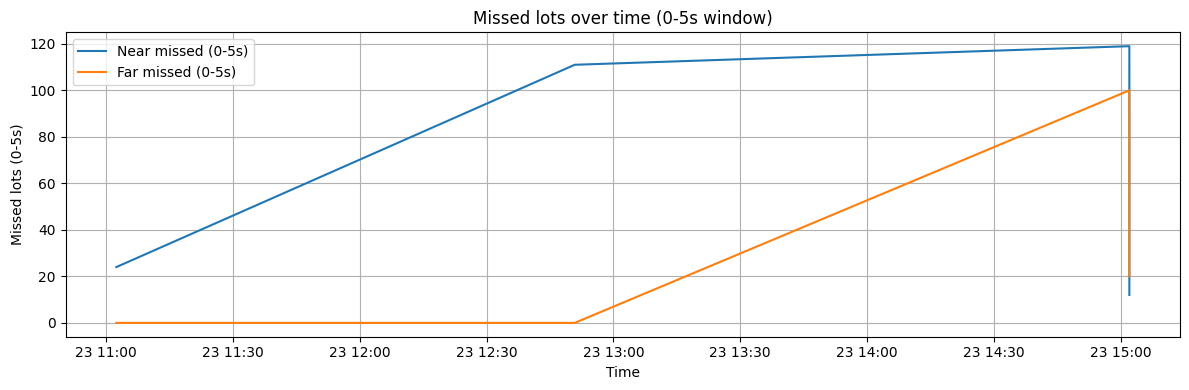

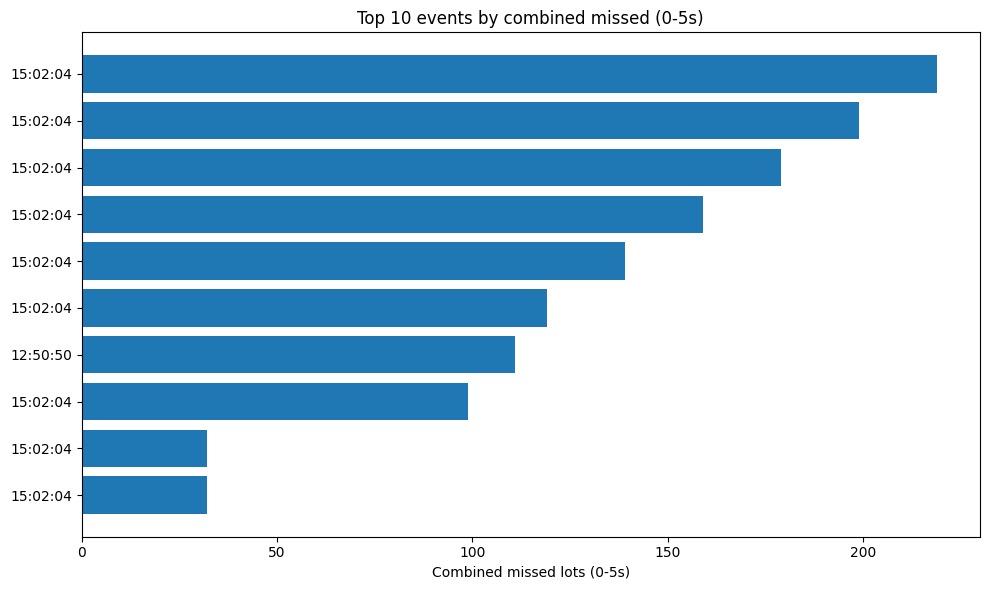

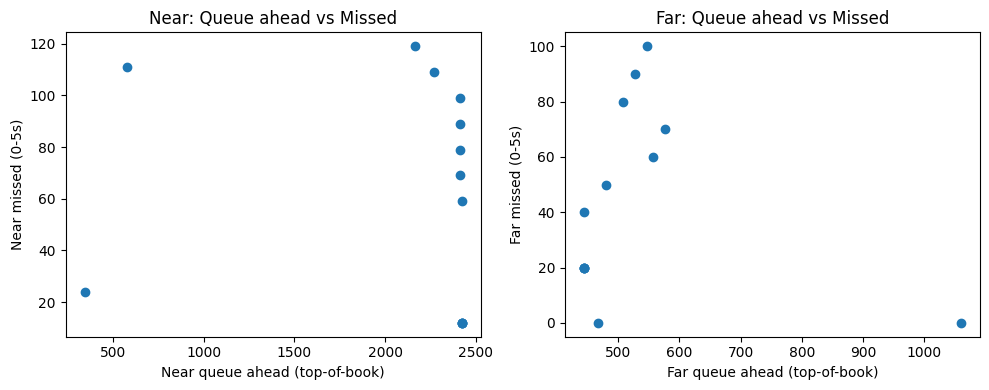

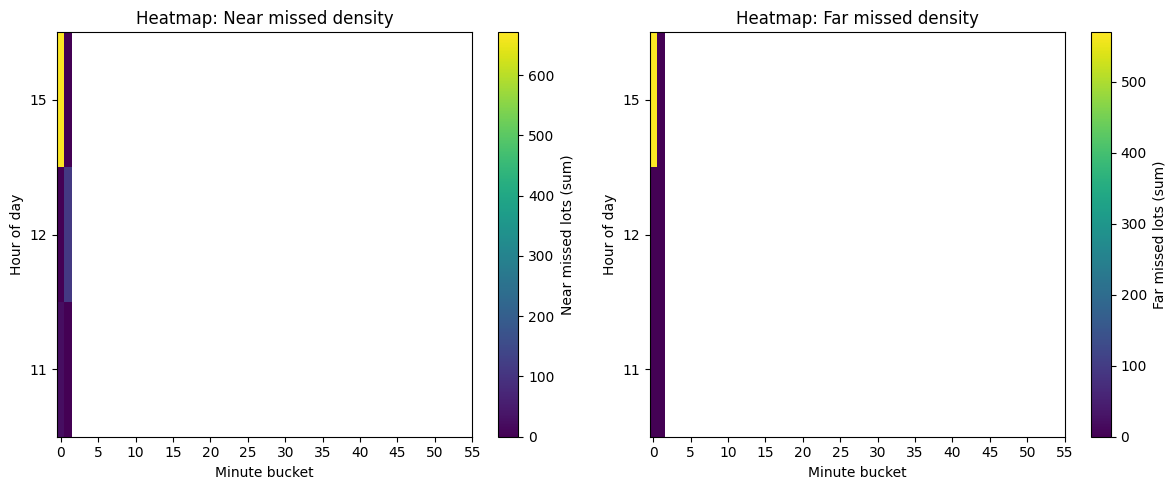

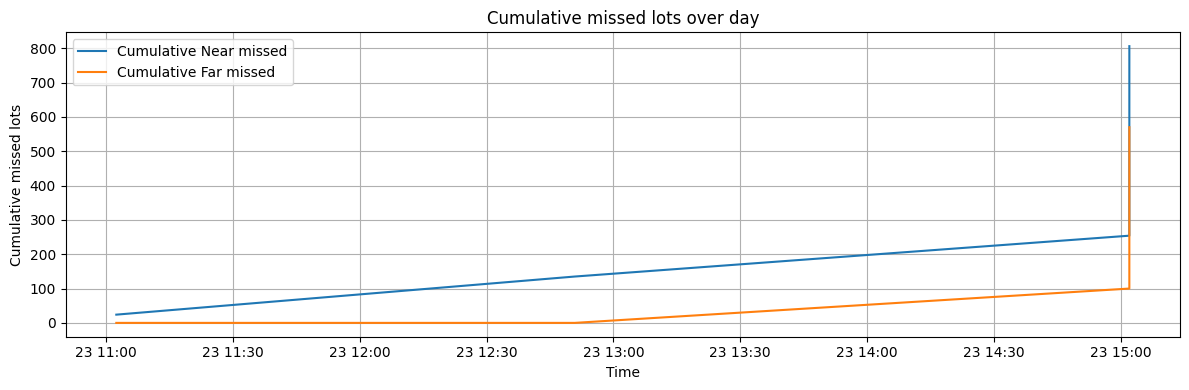

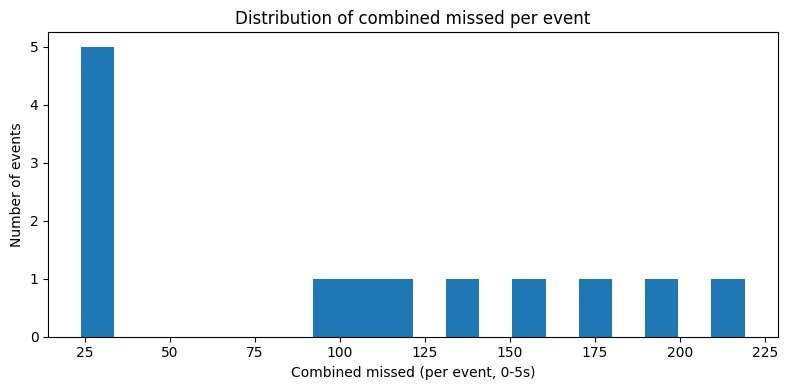

Saved images: missed_timeseries_5s.png, top_missed_events.png, queue_vs_missed_scatter.png, missed_heatmap.png, cumulative_missed.png, hist_combined_missed.png
Saved missed_summary_small.csv


,timestamp,near_same_or_better_5s,far_same_or_better_5s,combined_missed_5s,near_queue_ahead_top,far_queue_ahead_top
0,2025-09-23 15:02:04.712,12,20,32,2424,444
1,2025-09-23 15:02:04.712,12,20,32,2424,444
2,2025-09-23 15:02:04.701,59,40,99,2424,444
3,2025-09-23 12:50:50.419,111,0,111,578,1060
4,2025-09-23 15:02:04.690,69,50,119,2414,480
5,2025-09-23 15:02:04.680,79,60,139,2411,557
6,2025-09-23 15:02:04.669,89,70,159,2411,577
7,2025-09-23 15:02:04.658,99,80,179,2411,508
8,2025-09-23 15:02:04.647,109,90,199,2272,528
9,2025-09-23 15:02:04.636,119,100,219,2165,548


In [18]:
# ---------------- Visualization cell (Colab) ----------------
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Ensure aug_df exists
try:
    aug_df
except NameError:
    raise RuntimeError("aug_df not found — run the augmented analysis cell first.")

# Parse timestamps to pandas datetime if needed
aug_df['timestamp'] = pd.to_datetime(aug_df['timestamp'])

# Create an index for plotting (time ordered)
plot_df = aug_df.sort_values('timestamp').reset_index(drop=True)

# 1) Time-series: missed lots (0-5s) for near and far
plt.figure(figsize=(12,4))
plt.plot(plot_df['timestamp'], plot_df['near_same_or_better_5s'], label='Near missed (0-5s)')
plt.plot(plot_df['timestamp'], plot_df['far_same_or_better_5s'], label='Far missed (0-5s)')
plt.xlabel('Time')
plt.ylabel('Missed lots (0-5s)')
plt.title('Missed lots over time (0-5s window)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("missed_timeseries_5s.png", dpi=150)
plt.show()

# 2) Bar chart: top-N events by combined missed (0-5s)
TOP_N = 10
plot_df['combined_missed_5s'] = plot_df['near_same_or_better_5s'] + plot_df['far_same_or_better_5s']
top_events = plot_df.sort_values('combined_missed_5s', ascending=False).head(TOP_N).copy()
top_events = top_events[::-1]  # reverse for horizontal bar (small->big)
plt.figure(figsize=(10,6))
plt.barh(range(len(top_events)), top_events['combined_missed_5s'])
plt.yticks(range(len(top_events)), top_events['timestamp'].dt.strftime('%H:%M:%S'))
plt.xlabel('Combined missed lots (0-5s)')
plt.title(f'Top {TOP_N} events by combined missed (0-5s)')
plt.tight_layout()
plt.savefig("top_missed_events.png", dpi=150)
plt.show()

# 3) Scatter: queue ahead vs missed (near & far)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(plot_df['near_queue_ahead_top'], plot_df['near_same_or_better_5s'])
plt.xlabel('Near queue ahead (top-of-book)')
plt.ylabel('Near missed (0-5s)')
plt.title('Near: Queue ahead vs Missed')

plt.subplot(1,2,2)
plt.scatter(plot_df['far_queue_ahead_top'], plot_df['far_same_or_better_5s'])
plt.xlabel('Far queue ahead (top-of-book)')
plt.ylabel('Far missed (0-5s)')
plt.title('Far: Queue ahead vs Missed')

plt.tight_layout()
plt.savefig("queue_vs_missed_scatter.png", dpi=150)
plt.show()

# 4) Heatmap: missed volume density by hour vs minute-bucket (aggregate)
# Create minute buckets
tmp = plot_df.copy()
tmp['hour'] = tmp['timestamp'].dt.hour
tmp['minute_bucket'] = tmp['timestamp'].dt.minute
# Pivot for heatmap (hours x minute buckets)
heat_near = tmp.pivot_table(index='hour', columns='minute_bucket', values='near_same_or_better_5s', aggfunc='sum', fill_value=0)
heat_far  = tmp.pivot_table(index='hour', columns='minute_bucket', values='far_same_or_better_5s', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(heat_near.values, aspect='auto', origin='lower')
plt.colorbar(label='Near missed lots (sum)')
plt.xlabel('Minute bucket')
plt.ylabel('Hour of day')
plt.title('Heatmap: Near missed density')
plt.xticks(ticks=np.arange(0,60,5), labels=np.arange(0,60,5))
plt.yticks(ticks=np.arange(0,heat_near.shape[0]), labels=heat_near.index)

plt.subplot(1,2,2)
plt.imshow(heat_far.values, aspect='auto', origin='lower')
plt.colorbar(label='Far missed lots (sum)')
plt.xlabel('Minute bucket')
plt.ylabel('Hour of day')
plt.title('Heatmap: Far missed density')
plt.xticks(ticks=np.arange(0,60,5), labels=np.arange(0,60,5))
plt.yticks(ticks=np.arange(0,heat_far.shape[0]), labels=heat_far.index)

plt.tight_layout()
plt.savefig("missed_heatmap.png", dpi=150)
plt.show()

# 5) Cumulative missed volume over time
plot_df['cum_near_missed'] = plot_df['near_same_or_better_5s'].cumsum()
plot_df['cum_far_missed']  = plot_df['far_same_or_better_5s'].cumsum()

plt.figure(figsize=(12,4))
plt.plot(plot_df['timestamp'], plot_df['cum_near_missed'], label='Cumulative Near missed')
plt.plot(plot_df['timestamp'], plot_df['cum_far_missed'], label='Cumulative Far missed')
plt.xlabel('Time')
plt.ylabel('Cumulative missed lots')
plt.title('Cumulative missed lots over day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cumulative_missed.png", dpi=150)
plt.show()

# 6) Histogram of per-event combined missed sizes
plt.figure(figsize=(8,4))
plt.hist(plot_df['combined_missed_5s'], bins=20)
plt.xlabel('Combined missed (per event, 0-5s)')
plt.ylabel('Number of events')
plt.title('Distribution of combined missed per event')
plt.tight_layout()
plt.savefig("hist_combined_missed.png", dpi=150)
plt.show()

# Save a small summary CSV for quick reference
summary_small = {
    'n_events': len(plot_df),
    'total_near_missed_5s': int(plot_df['near_same_or_better_5s'].sum()),
    'total_far_missed_5s': int(plot_df['far_same_or_better_5s'].sum()),
    'max_combined_missed_5s': int(plot_df['combined_missed_5s'].max())
}
pd.DataFrame([summary_small]).to_csv("missed_summary_small.csv", index=False)

print("Saved images: missed_timeseries_5s.png, top_missed_events.png, queue_vs_missed_scatter.png, missed_heatmap.png, cumulative_missed.png, hist_combined_missed.png")
print("Saved missed_summary_small.csv")

# Optional: display top events table inline
display(HTML("<h4>Top missed events (sample)</h4>"))
display(top_events[['timestamp','near_same_or_better_5s','far_same_or_better_5s','combined_missed_5s','near_queue_ahead_top','far_queue_ahead_top']].reset_index(drop=True).round(0))


Saved actionable insight CSV: actionable_insights.csv


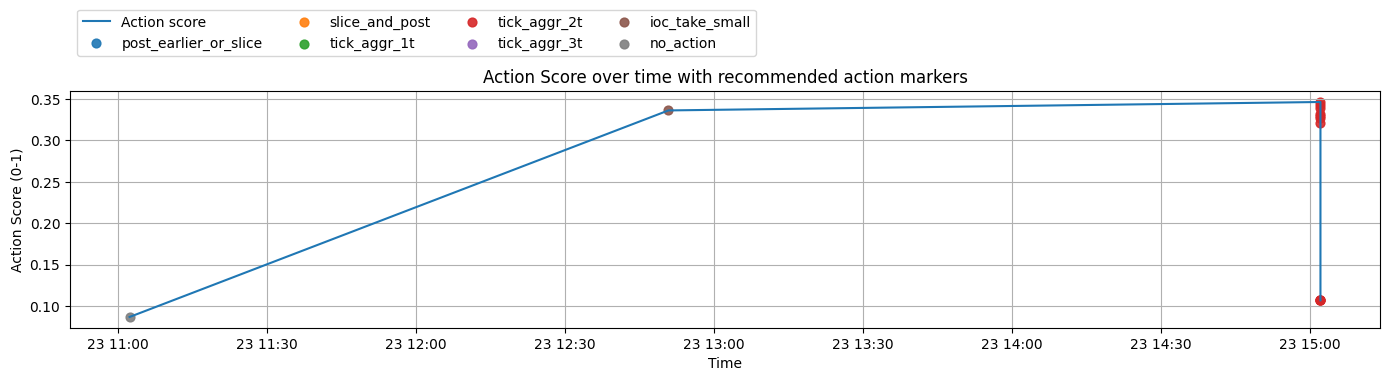

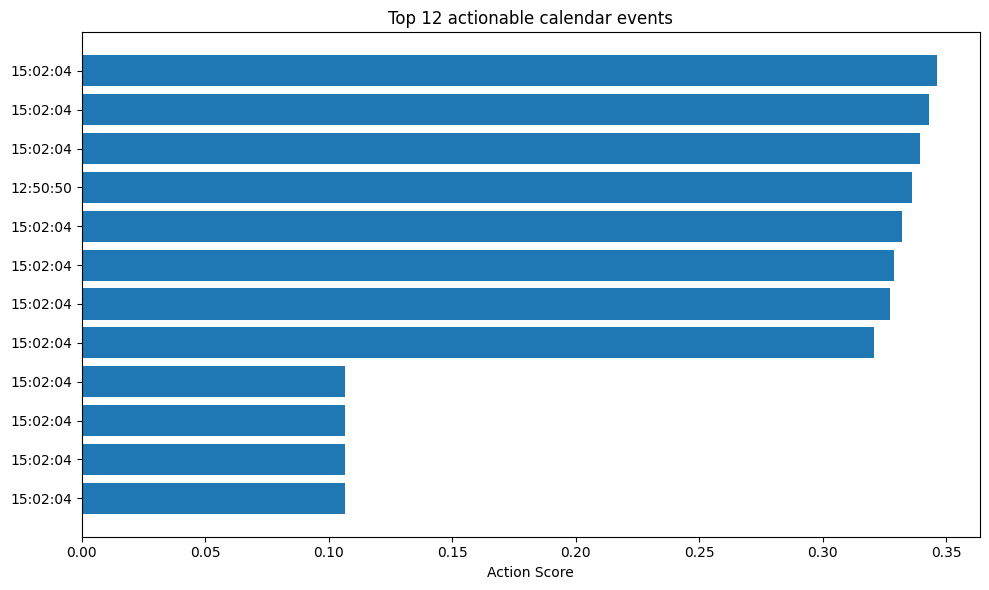

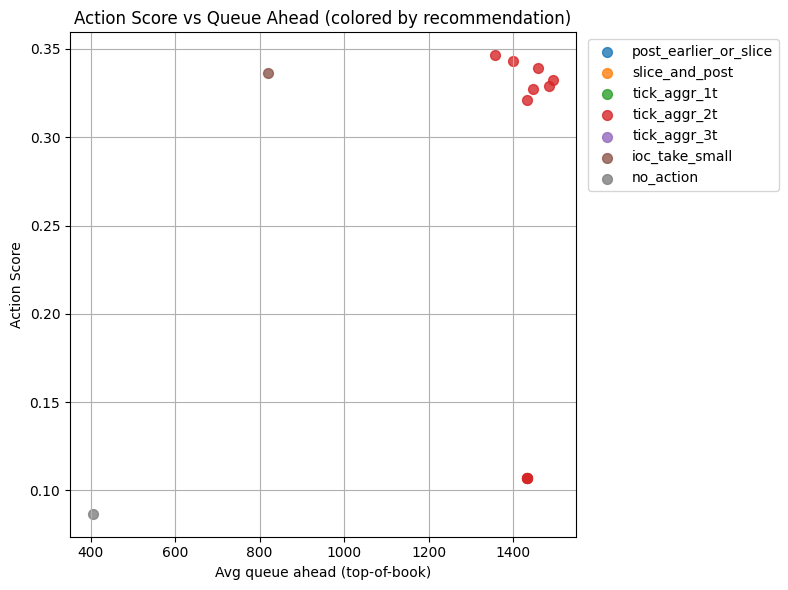

,est_cal_improve_1t,combined_churn_5s,near_same_or_better_5s,far_same_or_better_5s,action_score,n_events
recommendation,,,,,,
ioc_take_small,0.0,111,111,0,0.336248,1
no_action,0.0,24,24,0,0.086674,1
tick_aggr_2t,0.0,1241,671,570,0.251456,11


Saved plots: action_score_timeline.png, top_actionable_events.png, action_score_vs_queue.png
Saved actionable_aggregates.csv and actionable_insights.csv


In [19]:
# ---------------- Actionable insights + visualization cell ----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Safety: ensure aug_df exists and has required columns
required_cols = ['timestamp','near_same_or_better_5s','far_same_or_better_5s',
                 'near_queue_ahead_top','far_queue_ahead_top',
                 'near_price','far_price']
for c in required_cols:
    if c not in aug_df.columns:
        raise RuntimeError(f"aug_df missing required column: {c}. Run augmented analysis first.")

df = aug_df.copy().sort_values('timestamp').reset_index(drop=True)

# ---------- Scoring logic (tunable thresholds) ----------
# thresholds (tweakable)
HIGH_CHURN = 100            # lots in 0-5s considered high churn
MED_CHURN = 30
HIGH_QUEUE_NEAR = 1000
HIGH_QUEUE_FAR  = 300
SMALL_ORDER_SLICE = 50      # if your calendar lot size <= this, slicing helps
TICK_EFFECTIVE_THRESHOLD = 0.001   # est cal improvement threshold (price units) to consider tick aggression

# compute derived metrics
df['combined_churn_5s'] = df['near_same_or_better_5s'] + df['far_same_or_better_5s']
df['avg_queue_ahead'] = (df['near_queue_ahead_top'] + df['far_queue_ahead_top']) / 2.0
df['total_calendar_lots'] = df[['near_qty','far_qty']].fillna(0).sum(axis=1).replace(0,1)

# estimate PIQ loss severity: proportion of short-window churn relative to queue+churn
# (higher -> more likely PIQ rather than bad price)
df['piq_severity_near'] = df['near_same_or_better_5s'] / (df['near_queue_ahead_top'] + df['near_same_or_better_5s'] + 1e-9)
df['piq_severity_far']  = df['far_same_or_better_5s'] / (df['far_queue_ahead_top'] + df['far_same_or_better_5s'] + 1e-9)
df['piq_severity'] = (df['piq_severity_near'] + df['piq_severity_far']) / 2.0

# compute estimated cal improvement if we acted (use existing cal_improve_both_1t if present else 0)
if 'cal_improve_both_1t' in df.columns:
    df['est_cal_improve_1t'] = df['cal_improve_both_1t']
else:
    # fallback: sum of near_extra_1t & far_extra_1t mapped to ticks
    near_ex = df.get('near_extra_1t', pd.Series([0]*len(df))).fillna(0)
    far_ex  = df.get('far_extra_1t', pd.Series([0]*len(df))).fillna(0)
    df['est_cal_improve_1t'] = (near_ex + far_ex) * 0.005 / df['total_calendar_lots']  # very rough

# Actionability score (0..1): combine piq_severity, normalized churn, and estimated cal improvement
# Normalize churn: map combined_churn_5s to 0..1 using MED_CHURN..HIGH_CHURN
df['churn_norm'] = df['combined_churn_5s'].clip(0, HIGH_CHURN) / HIGH_CHURN
# Normalize cal_improve: scale est_cal_improve_1t by TICK_SIZE
df['cal_improve_ticks'] = df['est_cal_improve_1t'] / 0.005
df['cal_improve_norm'] = (df['cal_improve_ticks'] / 1.0).clip(0,1)   # treat 1 tick as good
# Action score weights
w_piq = 0.45
w_churn = 0.30
w_cal = 0.25
df['action_score'] = (w_piq * df['piq_severity']) + (w_churn * df['churn_norm']) + (w_cal * df['cal_improve_norm'])

# ---------- Recommendation rules ----------
def recommend_row(r):
    # Priority:
    # 1) If PIQ severity high and churn high -> post_earlier / slice
    # 2) If tick counterfactual shows > threshold improvement -> tick_aggr
    # 3) If small extra at multi-tick and you accept paying ticks -> ioc_taker or tick_aggr
    # 4) else no_action
    if (r['piq_severity'] > 0.15) and (r['combined_churn_5s'] >= HIGH_CHURN or r['near_same_or_better_5s'] >= HIGH_CHURN or r['far_same_or_better_5s'] >= HIGH_CHURN):
        if r['total_calendar_lots'] <= SMALL_ORDER_SLICE:
            return 'post_earlier_or_slice'
        else:
            return 'slice_and_post'
    if r['est_cal_improve_1t'] >= TICK_EFFECTIVE_THRESHOLD:
        return 'tick_aggr_1t'
    # multi-tick check (if any cal_improve_both_Nt > threshold)
    for n in range(2,4):
        col = f'cal_improve_both_{n}t'
        if col in r and r[col] >= TICK_EFFECTIVE_THRESHOLD:
            return f'tick_aggr_{n}t'
    # fallback small IOC if churn medium and queue large
    if r['combined_churn_5s'] >= MED_CHURN and (r['near_queue_ahead_top'] >= HIGH_QUEUE_NEAR or r['far_queue_ahead_top'] >= HIGH_QUEUE_FAR):
        return 'ioc_take_small'
    return 'no_action'

df['recommendation'] = df.apply(recommend_row, axis=1)

# ---------- Save actionable insights CSV ----------
out_csv = "actionable_insights.csv"
cols_to_save = ['timestamp','near_price','far_price','calendar_realized','near_qty','far_qty',
                'near_queue_ahead_top','far_queue_ahead_top','near_same_or_better_5s','far_same_or_better_5s',
                'combined_churn_5s','piq_severity','est_cal_improve_1t','cal_improve_ticks','action_score','recommendation']
df.to_csv(out_csv, columns=cols_to_save, index=False)
print(f"Saved actionable insight CSV: {out_csv}")

# ---------- Visualizations ----------
plt.style.use('default')

# 1) Time series of action_score with colored markers by recommendation
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['action_score'], label='Action score', linewidth=1.5)
# color map for recommendations
rec_map = {
    'post_earlier_or_slice':'#1f77b4',
    'slice_and_post':'#ff7f0e',
    'tick_aggr_1t':'#2ca02c',
    'tick_aggr_2t':'#d62728',
    'tick_aggr_3t':'#9467bd',
    'ioc_take_small':'#8c564b',
    'no_action':'#7f7f7f'
}
for rec, color in rec_map.items():
    mask = df['recommendation']==rec
    plt.scatter(df.loc[mask,'timestamp'], df.loc[mask,'action_score'], color=color, label=rec, s=40, alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Action Score (0-1)')
plt.title('Action Score over time with recommended action markers')
plt.legend(ncol=4, bbox_to_anchor=(0,1.12), loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("action_score_timeline.png", dpi=150)
plt.show()

# 2) Bar: top N actionable opportunities (by action_score)
TOP_N = 12
top_actions = df.sort_values('action_score', ascending=False).head(TOP_N).copy()
plt.figure(figsize=(10,6))
bars = plt.barh(range(len(top_actions)), top_actions['action_score'][::-1])
yticks = top_actions['timestamp'].dt.strftime('%H:%M:%S')[::-1]
plt.yticks(range(len(top_actions)), yticks)
plt.xlabel('Action Score')
plt.title(f'Top {TOP_N} actionable calendar events')
plt.tight_layout()
plt.savefig("top_actionable_events.png", dpi=150)
plt.show()

# 3) Scatter: action_score vs avg_queue_ahead colored by recommendation
plt.figure(figsize=(8,6))
for rec, color in rec_map.items():
    m = df['recommendation'] == rec
    plt.scatter(df.loc[m,'avg_queue_ahead'], df.loc[m,'action_score'], label=rec, alpha=0.8, color=color, s=50)
plt.xlabel('Avg queue ahead (top-of-book)')
plt.ylabel('Action Score')
plt.title('Action Score vs Queue Ahead (colored by recommendation)')
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("action_score_vs_queue.png", dpi=150)
plt.show()

# 4) For each recommendation type, aggregate expected improvement (sum est_cal_improve_1t) and missed lots
agg = df.groupby('recommendation').agg({
    'est_cal_improve_1t':'sum',
    'combined_churn_5s':'sum',
    'near_same_or_better_5s':'sum',
    'far_same_or_better_5s':'sum',
    'action_score':'mean',
    'timestamp':'count'
}).rename(columns={'timestamp':'n_events'}).sort_values('est_cal_improve_1t', ascending=False)
display(HTML("<h4>Aggregate by recommendation</h4>"))
display(agg.round(6))

# save plots and aggregated CSV
agg.to_csv("actionable_aggregates.csv")
print("Saved plots: action_score_timeline.png, top_actionable_events.png, action_score_vs_queue.png")
print("Saved actionable_aggregates.csv and actionable_insights.csv")

# Small NL summary to copy-paste
nl = f"""
ACTIONABLE SUMMARY:
- Events analyzed: {len(df)}
- Top recommended actions by count: {agg.sort_values('n_events', ascending=False).head(3).index.tolist()}
- Highest total estimated calendar improvement (1-tick model) by recommendation: {agg['est_cal_improve_1t'].idxmax()}
- Suggestion: start with top {TOP_N} events in 'top_actionable_events.png' for manual review and test: use slicing/earlier posts on PIQ-heavy events; consider 1-tick aggression only where 'tick_aggr_1t' appears and cal_improve_1t >= {TICK_EFFECTIVE_THRESHOLD}.
"""
display(HTML(f"<pre>{nl}</pre>"))
